<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

# 📝 Assignment


# Breast Cancer Clustering



## 1. 아래의 주소를 참조하여, 데이터를 `df`에 준비하세요.

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

- Feature마다 scale이 다르기 때문에 `StandardScaler`를 적용해야합니다.
- 이후,  "diagnosis"에 있는 label 데이터를 따로 `label`이라는 변수로 생성하세요.
- "diagnosis"를 제거한 나머지 데이터를 사용하여 k-means clustering을 하며, 
- `n_clusters = 2`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

# 데이터 불러오기 및 결측치 제거
data_url = 'https://docs.google.com/uc?export=download&id=1vXHKJzEvhY52Cs2cZueXm25TtpPDCGCi'
df = pd.read_csv(data_url)
df.isna().sum()
df.drop('Unnamed: 32', axis=1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# 클러스터링 대상인 열과 나머지 열을 분리 후 표준화
features = df.loc[:, 'radius_mean':'fractal_dimension_worst']
label = df['diagnosis'] # 레이블 별도로 분리해두기
features = StandardScaler().fit_transform(features) # 데이터를 표준화한 값으로 대체

column = list(df.columns)
columns = df.columns[column.index('radius_mean') : column.index('fractal_dimension_worst')+1]
pd.DataFrame(features, columns=columns).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [3]:
# K-Means Clustering 시행
kmeans = KMeans(n_clusters = 2, random_state = 42) # 두 개의 클러스터로 나눔
kmeans.fit(features)
label2 = kmeans.labels_

# 시행 결과(각 데이터(row)별 label이 0 또는 1로 지정됨)
print(label2)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

## 2. 원래 데이터의 label과, clustering 이후의 라벨을 비교하여 accuracy를 측정하고 결과를 `Acc`에 저장하세요. 

- Acc = 전체 데이터 중 라벨이 일치하는 데이터 수 입니다.

ex)

|원래 라벨|cluster 이후 label|
|:-:|:-:|
|A|A|
|A|B|
|A|A|
|B|B|
|B|B|
|B|A|

accuracy = $(2 + 2) \over 6$

이때 아래의 코드를 참고하여 `0`과 `1`로 있는데이터를 `M`과 `B`로 바꿔서 작업하면 좋습니다. 

```python
label2 = label2.replace(0,'M')
label2 = label2.replace(1,'B')
```

In [4]:
label2 = pd.Series(label2) # Numpy array를 Series 형태로 변환
label2 = label2.replace(0,'M').replace(1,'B') # label 값 바꾸기

# 기존 데이터프레임의 label과 클러스터링 시행 후 얻은 label을 붙여서 비교
clustered = pd.DataFrame(pd.concat([label, label2], axis=1))
clustered.rename(columns={"diagnosis": "원래 라벨", 0: "cluster 이후 label"}, inplace=True)
clustered.head()

,원래 라벨,cluster 이후 label
0,M,M
1,M,M
2,M,M
3,M,M
4,M,M


In [5]:
# 기존 label과 클러스터링 시행 후의 label의 일치 정도 확인
Acc = len(clustered[clustered["원래 라벨"] == clustered["cluster 이후 label"]]) / len(clustered)
Acc

0.9050966608084359

In [6]:
# 참고
label2 = label2.replace(0,'M')
label2 = label2.replace(1,'B')
label2 = label2.to_numpy().flatten()

cnt = 0

for real, pred in zip(label.T, label2):
    if real == pred:
        cnt += 1

Acc = cnt/len(label)
Acc

0.9050966608084359

# 🔥 도전 과제

아래 링크를 참조하여 hierarchical clustering을 breast cancer dataset에 적용하고, 그 결과를 시각화하세요.

<https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering>


In [7]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
def plot_dendrogram(model, **kwargs):
  # Create linkage matrix and then plot the dendrogram

  # create the counts of samples under each node
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_) # 데이터의 개수
  for i, merge in enumerate(model.children_): # 클래스 묶음의 순서값과 묶음을 하나씩 가져옴
    current_count = 0
    for child_idx in merge: # 클래스 묶음에서 각 클래스의 번호를 하나씩 가져옴
      if child_idx < n_samples:
          current_count += 1  # leaf node
      else:
          current_count += counts[child_idx - n_samples] # non-leaf node
    counts[i] = current_count

  # linkage matrix : The first two columns denote the classes that have been clustered.
  #                  The third column denotes the distance between these classes.
  # model.children_ : 하나의 클러스터로 묶인 클래스 2개(2개 열)
  # model.distances_ : 묶인 두 클래스의 거리
  # counts : 묶음에 포함된 샘플(데이터)의 수
  linkage_matrix = np.column_stack([model.children_, model.distances_,
                                    counts]).astype(float)

  # Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)

# 참고 사이트
# AgglomerativeClustering : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
# dendrogram plotting : https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
# dendrogram : https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram
# linkage matrix : https://jehoons.github.io/linkage-matrix/
# linkage matrix : https://www.researchgate.net/figure/Linkage-matrix-In-figure-6-each-row-identifies-a-link-between-clustered-classes-The_fig4_309209207

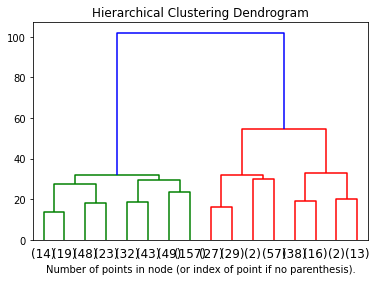

In [9]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(features)

# truncate_mode : p 값 기준
# - 'level' : 최대 p번 나누겠다(최초 1번 제외)
# - 'lastp' : 마지막에 p개만 남기겠다(= p개의 클러스터를 만들겠다)
# 참고 : https://stackoverflow.com/questions/66180002/scipy-cluster-hierarchy-dendrogram-exactly-what-does-truncate-mode-level-do
plot_dendrogram(model, truncate_mode='level', p=3)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

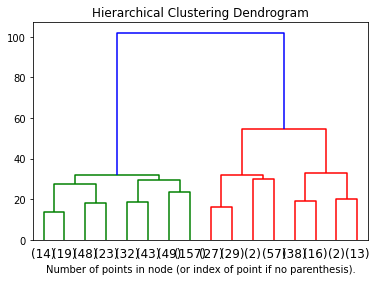

In [10]:
# 위에 있는거 다 필요없고 이렇게 간단하게도 가능합니다.
# (linkage matrix를 어떻게 만들어주냐의 차이)
Z = linkage(features, 'ward') # linkage matrix 생성

dendrogram(Z, truncate_mode='level', p=3) # 위에서 만든 matrix로 dendrogram 생성
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()